In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [3]:
netflix_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Scaler Case Studies/1.Netflix/netflix.csv')
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data cleaning and preprocessing for analysis. 

 Found 3 records where durations are present in the rating column. So let's correct those records.

In [5]:
# We can see that using below that '74 min', '84 min', '66 min' are present.
uniq_rating = list(netflix_df['rating'].unique())
print(uniq_rating)

# Get the indexes of those 3 records and populate the duration column with appropriate values and NaN in the rating field.
index_rating_change = netflix_df[netflix_df['rating'].isin(['74 min', '84 min', '66 min'])].index 
print(index_rating_change)

# Populate the durations from the rating field to duration, and make rating field none for those 3 records
netflix_df['duration'].loc[index_rating_change] = netflix_df['rating'].loc[index_rating_change]
netflix_df['rating'].loc[index_rating_change] = np.nan

print( netflix_df['duration'].loc[index_rating_change] )

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan, 'TV-Y7-FV', 'UR']
Int64Index([5541, 5794, 5813], dtype='int64')
5541    74 min
5794    84 min
5813    66 min
Name: duration, dtype: object


Add some date heirarchy fields

In [6]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['month_name_added'] = netflix_df['date_added'].dt.month_name()
netflix_df['year_added'] = netflix_df['date_added'].dt.year

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0



Denormalizing dataset for fields 
We found that some of the columns are pre normalized with multiple values, so we will create different dfs using those columns to use them in future for more analysis.

Those columns are director, cast, country, listed_in


In [7]:
netflix_director_df = pd.DataFrame( {'show_id' : netflix_df['show_id'], 
                                     'director' : netflix_df['director'].str.split(', ')} )
netflix_director_df = netflix_director_df.explode('director')


netflix_cast_df = pd.DataFrame( {'show_id' : netflix_df['show_id'], 
                                 'cast' : netflix_df['cast'].str.split(', ')} )
netflix_cast_df = netflix_cast_df.explode('cast')


netflix_country_df = pd.DataFrame( {'show_id' : netflix_df['show_id'], 
                                    'country' : netflix_df['country'].str.split(', ')} )
netflix_country_df = netflix_country_df.explode('country')


netflix_genre_df = pd.DataFrame( {'show_id' : netflix_df['show_id'], 
                                  'listed_in' : netflix_df['listed_in'].str.split(', ')} )
netflix_genre_df = netflix_genre_df.explode('listed_in')

In [19]:
# netflix_cast_df.groupby(['show_id', 'cast']).count().reset_index()


netflix_cast_df[netflix_cast_df.duplicated(['show_id', 'cast'], keep=False)]

,show_id,cast
1631,s1632,Micah Hauptman
1631,s1632,Micah Hauptman
6013,s6014,Adrianna Biedrzyńska
6013,s6014,Adrianna Biedrzyńska


In [21]:
netflix_df[ (netflix_df['show_id']=='s1632') | (netflix_df['show_id']=='s6014') ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
1631,s1632,Movie,Rust Creek,Jen McGowan,"Hermione Corfield, Jay Paulson, Sean O'Bryan, ...",United States,2020-11-30,2018,R,108 min,Thrillers,A wrong turn in the woods becomes a fight for ...,11.0,November,2020.0
6013,s6014,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland",2019-10-01,1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br...",10.0,October,2019.0


As netflix content has 2 types, Let's separate out movies and tv shows in different data frames

In [8]:
movies_df = netflix_df[netflix_df['type']=='Movie']
shows_df = netflix_df[netflix_df['type']=='TV Show']

print(f"Size of Movies {movies_df.shape[0]}, Size of TV Shows {shows_df.shape[0]}")

Size of Movies 6131, Size of TV Shows 2676


# Analysis On The Quantity of Movies & TV Shows

Comparing quantity of Movies to TV shows

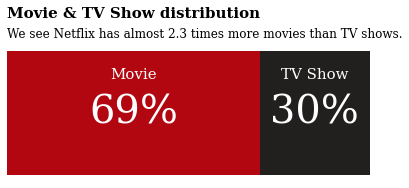

In [9]:
movie_percent, shows_percent = (len(movies_df) / len(netflix_df)), (len(shows_df) / len(netflix_df))


fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(0, movie_percent, color='#b20710')
ax.barh(0, shows_percent, left=movie_percent, color='#221f1f')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,f'We see Netflix has almost {round(movie_percent/shows_percent, 1)} times more movies than TV shows.',fontfamily='serif',fontsize=12)  
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# # Removing legend due to labelled plot
# ax.legend().set_visible(False)



# Filling up the details for Movies
ax.annotate(f"{int(movie_percent*100)}%",  xy=(movie_percent/2, 0), va = 'center', 
            ha='center',fontsize=40, fontweight='light', fontfamily='serif', color='white')
ax.annotate("Movie", xy=(movie_percent/2, 0.25), va = 'center', ha='center',
            fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Filling up the details for TV shows
ax.annotate(f"{int(shows_percent*100)}%", xy=(movie_percent + (shows_percent/2), 0),
            va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif', color='white')
ax.annotate("TV Show", xy=(movie_percent + (shows_percent/2), 0.25),
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif', color='white')

plt.show()

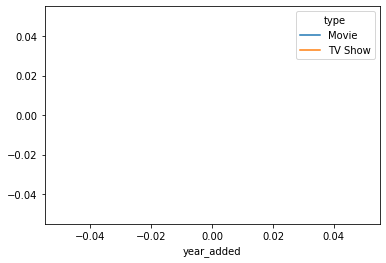

In [10]:
new_df = netflix[['year_added', 'show_id']].value
sns.lineplot(data=netflix_df, x='year_added', y=, hue='type')

Growth in terms of content over the years

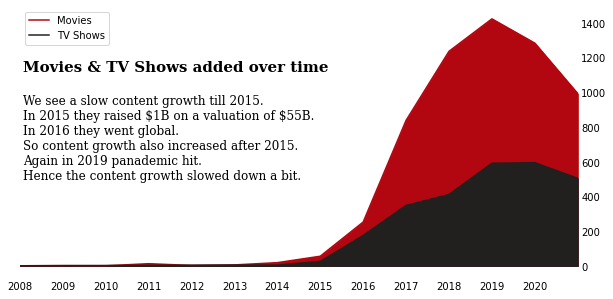

In [ ]:
movie_growth_df = movies_df.groupby(['year_added'])['year_added'].count()
show_growth_df = shows_df.groupby(['year_added'])['year_added'].count()

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(movie_growth_df.index, movie_growth_df.values, '#b20710', label='Movies')
ax.fill_between(movie_growth_df.index, movie_growth_df.values, color='#b20710')
ax.plot(show_growth_df.index, show_growth_df.values, '#221f1f', label='TV Shows')
ax.fill_between(show_growth_df.index, show_growth_df.values, color='#221f1f')


ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))
ax.yaxis.tick_right()
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
# This removes the annoying ticks near labels of x and y axis
ax.tick_params(axis=u'both', which=u'both',length=0)


fig.text(0.13, 0.7, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
observation = '''We see a slow content growth till 2015.
In 2015 they raised \$1B on a valuation of \$55B.
In 2016 they went global.
So content growth also increased after 2015.  
Again in 2019 panademic hit.
Hence the content growth slowed down a bit.'''
fig.text(0.13, 0.4, observation, fontsize=12, fontweight='light', fontfamily='serif')

ax.legend()
plt.show()

Which months have the most number of movies added

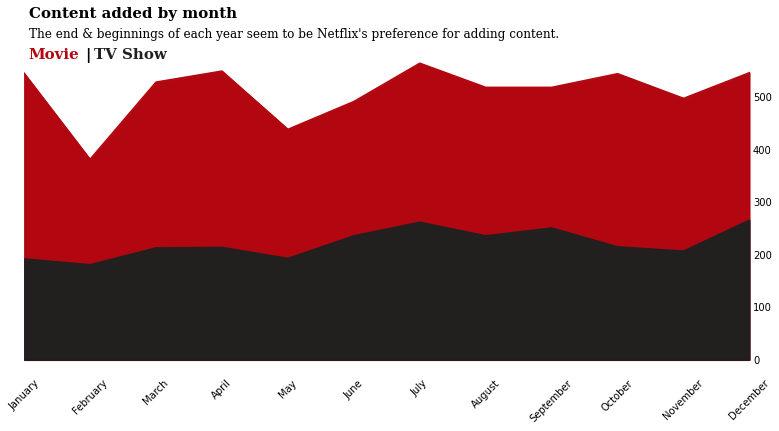

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# movie_growth_df = movies_df.groupby(['month_name_added'])['month_name_added'].count()
# show_growth_df = shows_df.groupby(['month_name_added'])['month_name_added'].count()

movie_growth_df = movies_df.groupby(['month_added', 'month_name_added'])['month_name_added'].count().reset_index(name='count')
show_growth_df = shows_df.groupby(['month_added', 'month_name_added'])['month_name_added'].count().reset_index(name='count')


fig, ax = plt.subplots(1,1, figsize=(13,6))
ax.plot(movie_growth_df['month_name_added'], movie_growth_df['count'], '#b20710', label='Movies')
ax.fill_between(movie_growth_df['month_name_added'], movie_growth_df['count'], color='#b20710')
ax.plot(show_growth_df['month_name_added'], show_growth_df['count'], '#221f1f', label='TV Shows')
ax.fill_between(show_growth_df['month_name_added'], show_growth_df['count'], color='#221f1f')

ax.xaxis.set_tick_params(rotation=45)



ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
# ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."
, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Country Wise Analysis

Top 10 Content Creator Countries

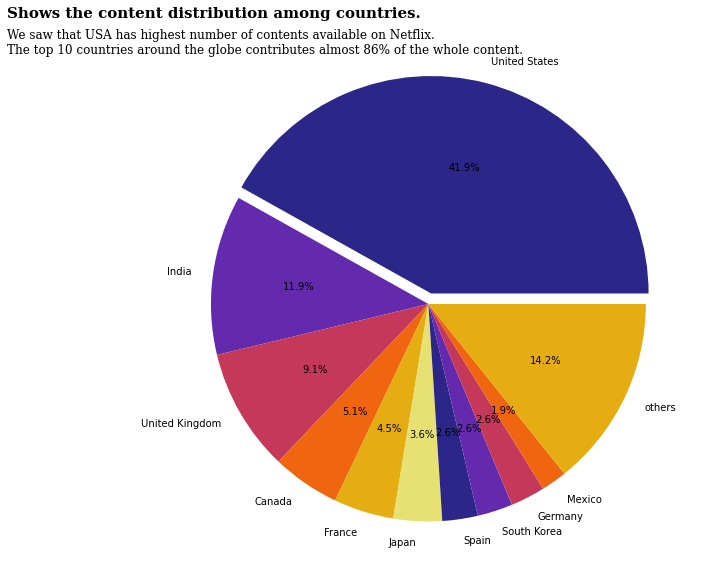

In [ ]:
top10_countries = list(netflix_country_df['country'].value_counts().head(10).index)

data = netflix_df.set_index('show_id').join(netflix_country_df[ netflix_country_df['country'].isin(top10_countries) ].\
                                                     set_index('show_id'), how='inner', rsuffix='_other').reset_index()

data = data.groupby('country_other')['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)

# Get % of contents presnt in Netflix from each country
data['count'] = data['count'] / netflix_df.shape[0]

# Add the remaining countries
data = pd.concat( [data, pd.DataFrame({ 'country_other':['others'], 'count':[1-data['count'].sum()] })], axis=0)


palette_color = sns.color_palette('CMRmap')

fig, ax = plt.subplots(1,1, figsize=(20,10))

fig.text(0.22, 0.9, "Shows the content distribution among countries.", fontsize=15, fontweight='bold', fontfamily='serif')

observation = '''We saw that USA has highest number of contents available on Netflix.
The top 10 countries around the globe contributes almost 86% of the whole content.'''
fig.text(0.22, 0.85, observation, fontsize=12, fontweight='light', fontfamily='serif')


# plotting data on chart
plt.pie(data['count'], labels=data['country_other'], colors=palette_color, autopct='%.1f%%', explode=[0.05] + ([0]*(data.shape[0]-1)) )
# displaying chart
plt.show()

Content type distribution for Top 10 countries

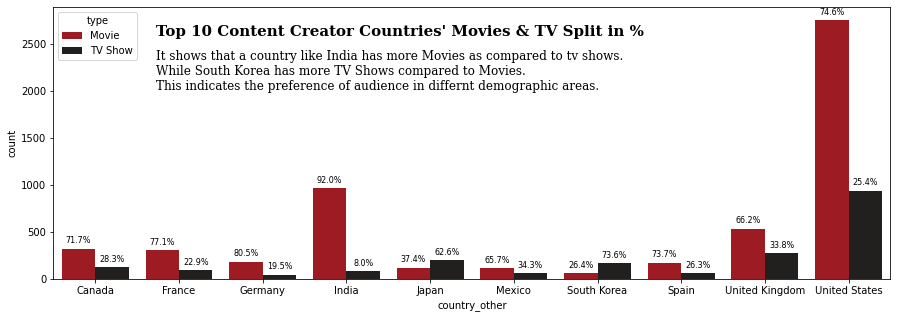

In [ ]:
top10_countries = list(netflix_country_df['country'].value_counts().head(10).index)

# top10_movies_df = movies_df.set_index('show_id').join(netflix_country_df[ netflix_country_df['country'].isin(top10_countries) ].\
#                                                       set_index('show_id'), how='inner', rsuffix='_other').reset_index()
# top10_shows_df = shows_df.set_index('show_id').join(netflix_country_df[ netflix_country_df['country'].isin(top10_countries) ].\
#                                                     set_index('show_id'), how='inner', rsuffix='_other').reset_index()


# top10_movies_df = top10_movies_df.groupby('country_other')['show_id'].count().reset_index(name='count')
# top10_shows_df = top10_shows_df.groupby('country_other')['show_id'].count().reset_index(name='count')


data = netflix_df.set_index('show_id').join(netflix_country_df[ netflix_country_df['country'].isin(top10_countries) ].\
                                                     set_index('show_id'), how='inner', rsuffix='_other').reset_index()

data = data.groupby(['country_other', 'type'])['show_id'].count().reset_index(name='count')



fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.barplot(x='country_other', y='count', hue='type', data=data, ax=ax, palette=['#b20710', '#221f1f'])
bar_heights = [bar.get_height() for bar in ax.patches]
bar_heights = list(zip(bar_heights[:len(bar_heights)//2], bar_heights[len(bar_heights)//2:]))

for i, bar in enumerate(ax.patches):
    annotate_val = format( bar.get_height()*100 / (bar_heights[i%10][0] + bar_heights[i%10][1]), '.1f')

    ax.annotate(annotate_val+'%', (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center', size=8, 
                xytext=(0, 8), textcoords='offset points')
    

fig.text(0.22, 0.8, "Top 10 Content Creator Countries' Movies & TV Split in %", fontsize=15, fontweight='bold', fontfamily='serif')

observations = '''It shows that a country like India has more Movies as compared to tv shows.
While South Korea has more TV Shows compared to Movies.
This indicates the preference of audience in differnt demographic areas.'''
fig.text(0.22, 0.65, observations, fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

Average time (difference between added and released time) Netflix takes to add movies from differnt countries.
This 

In [ ]:
top10_countries = list(netflix_country_df['country'].value_counts().head(10).index)

movies_data = movies_df.set_index('show_id').join(netflix_country_df[ netflix_country_df['country'].isin(top10_countries) ].\
                                                  set_index('show_id'), how='inner', rsuffix='_other').reset_index()
movies_data['year_diff'] = movies_data['year_added'].astype('int') - movies_data['release_year'].astype('int')


movies_data = movies_data.groupby('country_other')['year_diff'].mean().reset_index(name='year_diff_mean').sort_values('year_diff_mean', ascending=False)

movies_data

,country_other,year_diff_mean
3,India,7.123701
9,United States,6.779353
2,Germany,6.384615
8,United Kingdom,6.082707
4,Japan,5.764706
1,France,5.544554
0,Canada,4.053292
5,Mexico,3.306306
7,Spain,2.005848
6,South Korea,1.688525


# Moview Duration Analysis

Let's First See how the duration is distributed

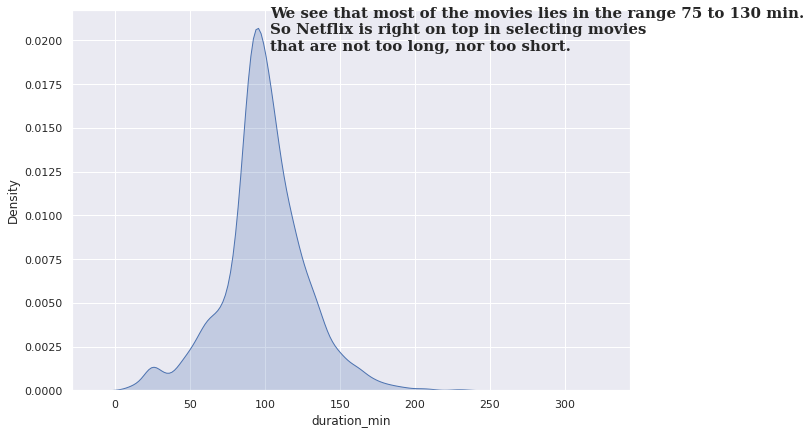

In [ ]:
import re

movies_df['duration_min'] = movies_df['duration'].apply(lambda x: re.findall(r'\d+', x)[0]).astype('int')


sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 7))
sns.kdeplot(data=movies_df['duration_min'], shade=True)

heading = '''We see that most of the movies lies in the range 75 to 130 min.
So Netflix is right on top in selecting movies 
that are not too long, nor too short.'''
fig.text(.4,.8,heading, fontfamily='serif',fontweight='bold',fontsize=15)

plt.show()

# Rating Analysis

Quantity of content present based on Rating

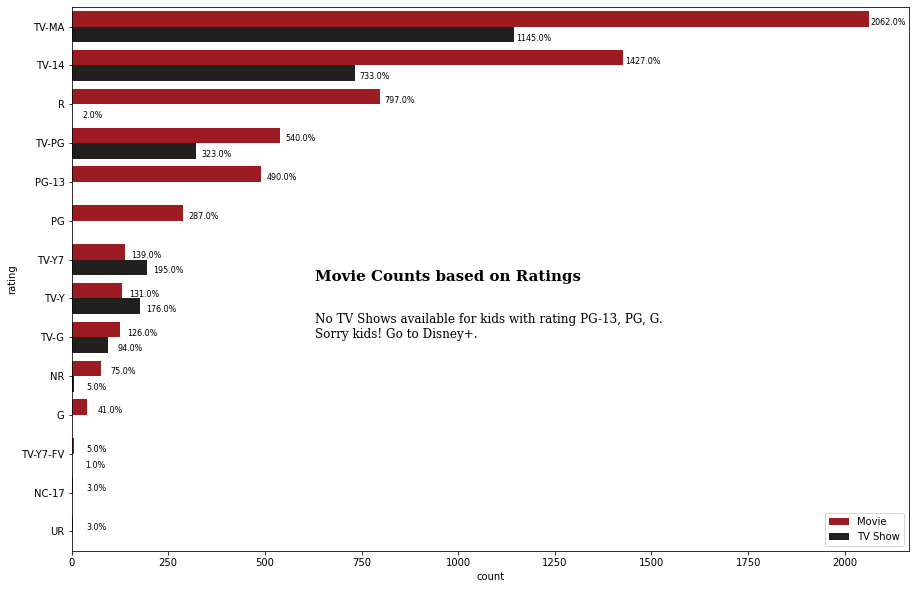

In [ ]:
data = netflix_df[['type', 'rating', 'show_id']].groupby(['rating', 'type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)


fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=data['count'], y=data['rating'], hue=data['type'], ax=ax, palette=['#b20710', '#221f1f'])

for i, bar in enumerate(ax.patches):
    ax.annotate(str(bar.get_width())+'%', (bar.get_y() + bar.get_width() + 50, bar.get_y()+0.5), 
                ha='center', va='center', size=8, xytext=(0, 8), textcoords='offset points')


fig.text(0.35, 0.5, "Movie Counts based on Ratings", fontsize=15, fontweight='bold', fontfamily='serif')

observations = '''No TV Shows available for kids with rating PG-13, PG, G.
Sorry kids! Go to Disney+.
'''
fig.text(0.35, 0.4, observations, fontsize=12, fontweight='light', fontfamily='serif')



plt.legend(loc='lower right')
plt.show()

# Genre Analysis

Genre HeatMap, To check related Genres

There are 20 types in the Netflix Movie Dataset
(20, 20)


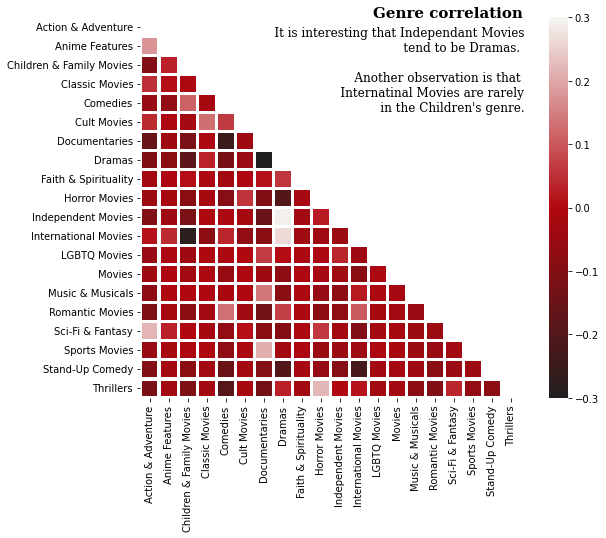

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()

    print(corr.shape)

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()



genre_heatmap(movies_df, 'Movie')
plt.show()

Top 10 content creator Countries & Genre

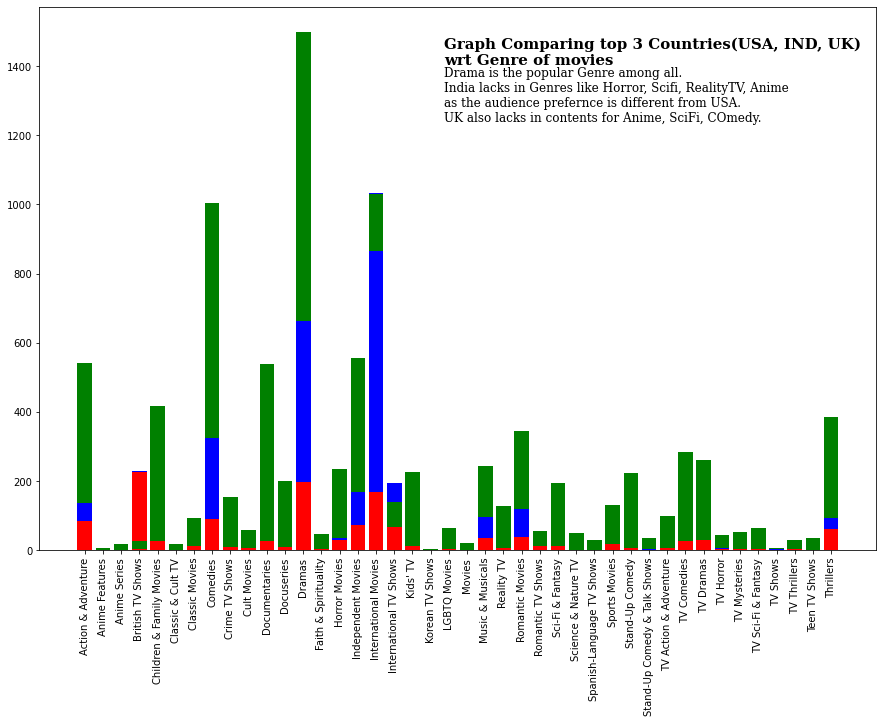

In [ ]:
top10_countries = list(netflix_country_df['country'].value_counts().head(3).index)

data = netflix_country_df[ netflix_country_df['country'].isin(top10_countries) ].\
       set_index('show_id').join(netflix_genre_df.set_index('show_id'), how='inner').reset_index()

data = data.groupby(['country', 'listed_in'])['show_id'].count().reset_index(name='count')

data = data.pivot(index='listed_in', columns='country', values='count').fillna(0).astype('int').reset_index()
data.head()



fig, ax = plt.subplots(figsize=(15,10))


heading = '''Graph Comparing top 3 Countries(USA, IND, UK) 
wrt Genre of movies'''
fig.text(.5,.8,heading, fontfamily='serif',fontweight='bold',fontsize=15)
observations = '''Drama is the popular Genre among all.
India lacks in Genres like Horror, Scifi, RealityTV, Anime 
as the audience prefernce is different from USA.
UK also lacks in contents for Anime, SciFi, Comedy.
'''
fig.text(.5, .7, observations, fontfamily='serif', fontsize=12)



plt.bar(data['listed_in'], data['United Kingdom'], color='r')
plt.bar(data['listed_in'], data['India'], bottom=data['United Kingdom'], color='b')
plt.bar(data['listed_in'], data['United States'], bottom=data['India'], color='g')


ax.xaxis.set_tick_params(rotation=90)
plt.show()

# Questions & Answers

Who are top actors on Netflix.

In [ ]:
# Here we can see most of the popular actors are form India.
# Expected as India produces huge numer of movies with these actors.
display(netflix_cast_df['cast'].value_counts()[:10])

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

Top 10 directors on Netflix

In [ ]:
# Glad to see Martin Scorsese making into the list. All time fav.
display(netflix_director_df['director'].value_counts()[:10])

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64

Oldest Movies on Netflix

In [ ]:
# Surprisingly Netflix does have these 1925 movies
small = movies_df.sort_values("release_year", ascending = True)
small[['title', "release_year"]][:15]

,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
7575,Nazi Concentration Camps,1945
7930,San Pietro,1945


Oldest TV Shows on Netflix

In [ ]:
small = shows_df.sort_values("release_year", ascending = True)
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
1331,Five Came Back: The Reference Films,1945
7743,Pioneers of African-American Cinema,1946
8541,The Twilight Zone (Original Series),1963
8189,The Andy Griffith Show,1967
4550,Monty Python's Fliegender Zirkus,1972
4551,Monty Python's Flying Circus,1974
6549,Dad's Army,1977
6674,El Chavo,1979
7588,Ninja Hattori,1981


In [ ]:
bool(5==5 and 6==4)

False